# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 15,5

---
# 2. import dataset

In [3]:
df = pd.read_csv('houses_to_rent.csv')
df.shape

(6080, 9)

In [4]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,acept,furnished,8000
1,0,64,2,1,1,10,acept,not furnished,820
2,1,443,5,5,4,3,acept,furnished,7000
3,1,73,2,2,1,12,acept,not furnished,1250
4,1,19,1,1,0,0,not acept,not furnished,1200


In [5]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
6075,1,50,2,1,1,2,acept,not furnished,1150
6076,1,84,2,2,1,16,not acept,furnished,2900
6077,0,48,1,1,0,13,acept,not furnished,950
6078,1,160,3,2,2,0,not acept,not furnished,3500
6079,1,60,2,1,1,4,acept,furnished,1900


---
# 3. categorical

In [6]:
df['animal_allowed'] = np.where(df['animal']=='acept', 1, 0)
df['has_furniture'] = np.where(df['furniture']=='furnished', 1, 0)
df1 = df[['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal_allowed', 'has_furniture']]
df1.shape

(6080, 8)

In [7]:
df1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal_allowed,has_furniture
0,1,240,3,3,4,0,1,1
1,0,64,2,1,1,10,1,0
2,1,443,5,5,4,3,1,1
3,1,73,2,2,1,12,1,0
4,1,19,1,1,0,0,0,0


In [8]:
df1.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal_allowed,has_furniture
6075,1,50,2,1,1,2,1,0
6076,1,84,2,2,1,16,0,1
6077,0,48,1,1,0,13,1,0
6078,1,160,3,2,2,0,0,0
6079,1,60,2,1,1,4,1,1


---
# 4. Correl Mat

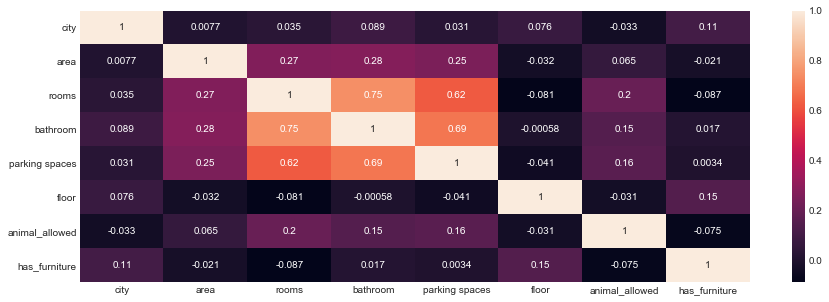

In [9]:
sns.heatmap(df1.corr(),annot = True);

---
# 5. min max scalar
* x_scaled = (x - min of x) / (max of x - min of x)
* x_scaled is between 0 and 1

In [10]:
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df1))
df2.shape

(6080, 8)

In [11]:
df2.head()

,0,1,2,3,4,5,6,7
0,1.0,0.009351,0.222222,0.222222,0.333333,0.000000,1.0,1.0
1,0.0,0.002195,0.111111,0.000000,0.083333,0.101010,1.0,0.0
2,1.0,0.017604,0.444444,0.444444,0.333333,0.030303,1.0,1.0
3,1.0,0.002561,0.111111,0.111111,0.083333,0.121212,1.0,0.0
4,1.0,0.000366,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [12]:
df2.tail()

,0,1,2,3,4,5,6,7
6075,1.0,0.001626,0.111111,0.000000,0.083333,0.020202,1.0,0.0
6076,1.0,0.003009,0.111111,0.111111,0.083333,0.161616,0.0,1.0
6077,0.0,0.001545,0.000000,0.000000,0.000000,0.131313,1.0,0.0
6078,1.0,0.006099,0.222222,0.111111,0.166667,0.000000,0.0,0.0
6079,1.0,0.002033,0.111111,0.000000,0.083333,0.040404,1.0,1.0


In [13]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,6080.0,0.863322,0.343535,0.0,1.000000,1.000000,1.000000,1.0
1,6080.0,0.005738,0.015269,0.0,0.001952,0.003659,0.007725,1.0
2,6080.0,0.165844,0.125518,0.0,0.111111,0.222222,0.222222,1.0
3,6080.0,0.149068,0.159873,0.0,0.000000,0.111111,0.222222,1.0
4,6080.0,0.146354,0.134326,0.0,0.083333,0.083333,0.166667,1.0
5,6080.0,0.057295,0.062312,0.0,0.000000,0.040404,0.090909,1.0
6,6080.0,0.767434,0.422502,0.0,1.000000,1.000000,1.000000,1.0
7,6080.0,0.260197,0.438778,0.0,0.000000,0.000000,1.000000,1.0


---
# 6. model

In [14]:
model = PCA(random_state=42).fit(df2)
model.explained_variance_ratio_

array([0.37083499, 0.31142513, 0.20826511, 0.08120792, 0.01249882,
       0.00881632, 0.0065677 , 0.00038401])

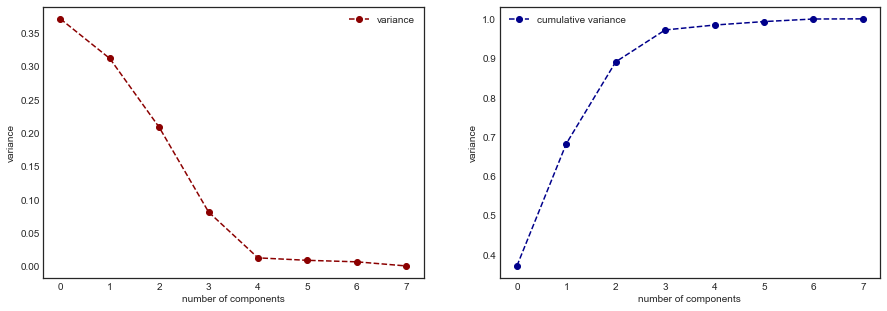

In [15]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(model.explained_variance_ratio_, linestyle='--', marker='o', color='darkred',label = 'variance')
axs[0].legend(loc = 'best')
axs[1].plot(np.cumsum(model.explained_variance_ratio_), linestyle='--', marker='o', color='darkblue',label = 'cumulative variance')
axs[1].legend(loc = 'best')

for ax in axs.flat:
    ax.set(xlabel='number of components', ylabel='variance')

---
# 7. dimensions

In [16]:
model = PCA(n_components=4, random_state = 42).fit(df2)
components = model.transform(df2)
components = pd.DataFrame(components, columns = ['C1', 'C2', 'C3', 'C4'])

In [17]:
df3 = pd.concat([components, df1], axis = 1)
df3.shape

(6080, 12)

In [18]:
df3.head(10)

,C1,C2,C3,C4,city,area,rooms,bathroom,parking spaces,floor,animal_allowed,has_furniture
0,0.512212,-0.606922,0.001389,0.138911,1,240,3,3,4,0,1,1
1,-0.484093,0.029839,0.801398,-0.128672,0,64,2,1,1,10,1,0
2,0.495294,-0.637207,-0.021295,0.399360,1,443,5,5,4,3,1,1
3,-0.305152,-0.066853,-0.182058,-0.128640,1,73,2,2,1,12,1,0
4,0.217248,0.802227,-0.158314,-0.169636,1,19,1,1,0,0,0,0
5,-0.296088,-0.045633,-0.167764,-0.301046,1,13,1,1,0,2,1,0
6,0.537271,-0.561020,0.030878,-0.251801,1,55,1,1,1,2,1,1
7,-0.307222,-0.065991,-0.181383,-0.127465,1,55,2,2,1,2,1,0
8,0.525734,-0.573465,0.022317,-0.143552,1,82,3,1,1,3,1,1
9,-0.295559,-0.052190,-0.171089,-0.259468,1,32,1,1,1,16,1,0


In [19]:
df3.tail(10)

,C1,C2,C3,C4,city,area,rooms,bathroom,parking spaces,floor,animal_allowed,has_furniture
6070,-0.332386,-0.115537,-0.215614,0.295893,1,200,4,5,3,2,1,0
6071,-0.522489,-0.039238,0.754203,0.469749,0,600,5,5,4,0,1,0
6072,0.507802,-0.623729,-0.011259,0.266697,1,200,4,4,4,21,1,1
6073,-0.307431,-0.065908,-0.181318,-0.127318,1,88,2,2,1,1,1,0
6074,0.871561,0.379886,1.019042,-0.087764,0,28,1,1,0,0,0,1
6075,-0.304331,-0.057164,-0.174394,-0.203614,1,50,2,1,1,2,1,0
6076,1.045157,0.270457,0.028015,0.008043,1,84,2,2,1,16,0,1
6077,-0.475230,0.041109,0.807824,-0.226442,0,48,1,1,0,13,1,0
6078,0.197866,0.770333,-0.178565,0.101429,1,160,3,2,2,0,0,0
6079,0.531814,-0.567371,0.026497,-0.197862,1,60,2,1,1,4,1,1
